257    7594.27
Name: Population, dtype: float64
                Population          GDP  GDP per capita  pobMundial  \
Country Name                                                          
United States      3271.67  20494099.85        62641.01     7594.27   
China             13927.30  13608151.86         9770.85     7594.27   
Japan              1265.29   4970915.56        39286.74     7594.27   
Germany             829.28   3996759.29        48195.58     7594.27   
United Kingdom      664.89   2825207.95        42491.36     7594.27   
France              669.87   2777535.24        41463.64     7594.27   
India             13526.17   2726322.62         2015.59     7594.27   
Italy               604.31   2073901.99        34318.35     7594.27   
Brazil             2094.69   1868626.09         8920.76     7594.27   
Canada              370.59   1709327.32        46124.67     7594.27   

                % respecto a pobMundial  
Country Name                             
United States  

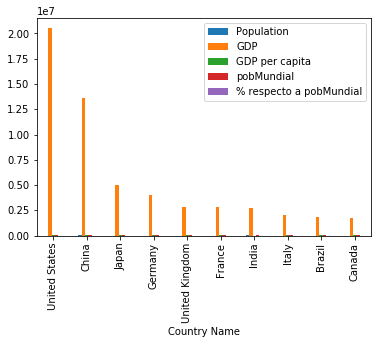

         Population           GDP  GDP per capita    pobMundial  \
count     10.000000  1.000000e+01       10.000000  1.000000e+01   
mean    3722.406000  5.705085e+06    33522.855000  7.594270e+03   
std     5345.168564  6.273738e+06    19892.587814  1.917383e-12   
min      370.590000  1.709327e+06     2015.590000  7.594270e+03   
25%      666.135000  2.237007e+06    15907.725000  7.594270e+03   
50%     1047.285000  2.801372e+06    40375.190000  7.594270e+03   
75%     2977.425000  4.727376e+06    45216.342500  7.594270e+03   
max    13927.300000  2.049410e+07    62641.010000  7.594270e+03   

       % respecto a pobMundial  
count                10.000000  
mean                  0.490160  
std                   0.703842  
min                   0.048799  
25%                   0.087715  
50%                   0.137905  
75%                   0.392062  
max                   1.833922  


In [3]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
from pandas import *
import matplotlib.pyplot as plt
import numpy
data = read_excel('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel', sheet_name=0, skiprows=3)
#data
#print (data)

# Crea un dataframe vacio
dfp = DataFrame()
#dfp

# Al dataframe vacio se le agrega la columna Country Name
dfp['Country Name'] = data['Country Name']
#dfp
#print (dfp)

# Se agrega la columan del año 2018
dfp['Population'] = data['2018']
#dfp
#print (dfp)
pobMundial=round(dfp[dfp['Country Name']=='World']['Population']/1000000,2)
print(pobMundial)

# Lee los datos desde archivo excel
# data = read_excel('GDP_TOT_2018_ALL.xls', sheet_name=0, skiprows=3)

# Descarga la información directamente desde el sitio web
data = read_excel('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel', sheet_name=0, skiprows=3)
#data

# Crea un dataframe vacio
dfg = DataFrame()
#dfg

# Al dataframe vacio se le agrega la columna Country Name
dfg['Country Name'] = data['Country Name']
#dfg

# Se agrega la columan del año 2018
dfg['GDP'] = data['2018']
#dfg
#print (dfg)

# Merge data
dfm = merge(dfp,dfg,on='Country Name')
#dfm
#print (dfm)

# New column
ip = round(dfm['GDP']/dfm['Population'],2)
dfm['GDP per capita'] = ip
#dfm
#print(dfm)

# Update a column (Population in thousands)
dfm['Population'] = round(dfm['Population'] / 100000, 2)
#dfm
#print (dfm)

# Update a column (GDP in million)
dfm['GDP'] = round(dfm['GDP'] / 1000000, 2)
#dfm
#print (dfm)

# Fillig NaN
dfm = dfm.fillna(value=0)

dfm.set_index('Country Name',inplace=True)

dff = dfm.drop(['World',
'High income',
'OECD members',
'Post-demographic dividend',
'IDA & IBRD total',
'Low & middle income',
'Middle income',
'IBRD only',
'East Asia & Pacific',
'Upper middle income',
'Europe & Central Asia',
'North America',
'Late-demographic dividend',
'European Union',
'East Asia & Pacific (excluding high income)',
'East Asia & Pacific (IDA & IBRD countries)',
'Euro area',
'Early-demographic dividend',
'Lower middle income',
'Latin America & Caribbean',
'Latin America & Caribbean (excluding high income)',
'Europe & Central Asia (IDA & IBRD countries)',
'Middle East & North Africa',
'South Asia',
'South Asia (IDA & IBRD)',
'Europe & Central Asia (excluding high income)',
'Arab World',
'IDA total',
'Latin America & the Caribbean (IDA & IBRD countries)',
'Sub-Saharan Africa (IDA & IBRD countries)',
'Sub-Saharan Africa',
'Sub-Saharan Africa (excluding high income)',
'Central Europe and the Baltics',
'Pre-demographic dividend',
'IDA only',
'Least developed countries: UN classification',
'IDA blend',
'Fragile and conflict affected situations',
'Heavily indebted poor countries (HIPC)',
'Low income',
'Small states',
'Other small states'])

mediaP=dff['Population'].mean()
medianaP=dff['Population'].median()
deviacionP=dff['Population'].std()

mediaG=dff['GDP'].mean()
medianaG=dff['GDP'].median()
deviacionG=dff['GDP'].std()

mediaGp=dff['GDP per capita'].mean()
medianaGp=dff['GDP per capita'].median()
deviacionGp=dff['GDP per capita'].std()




# Top 10 de las economias del mundo
df10=dff.sort_values('GDP',ascending=False).head(10)
df10['pobMundial']=float(pobMundial)
df10['% respecto a pobMundial']=df10['Population']/df10['pobMundial']
print(df10)


# Graficar
ax = df10.sort_values('GDP',ascending=False).head(10).plot.bar()
plt.show()

# Resumen estadístico
print (df10.describe())